# Linear Regression

## [ Linear Regression : 선형 회귀 ]

### 1. 선형회귀

* 예측값을 직선으로 표현하는 모델
* $ \hat{y} = \beta _0 + \beta _1 x $
  * $\hat{y}$ : 예측값
  * $x$ : 입력값(data)
  * $\beta _0$ :편향
  * $\beta _1$ : 계수(coefficient), 회귀선의 기울기

### 2. 다변량 회귀 : Multivariate Regression

* 두 개 이상의 변수로 만든 회귀식
* $ \hat{y} = \beta _0 + \beta _1 x_1 + \beta _2 x_2 ..$
* 변수가 많은 경우 행렬로 표시함
  * $ y = \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ y_4 \\ \end{bmatrix}, 
\beta = \begin{bmatrix} \beta_1 \\ \beta_2 \\ \beta_3 \\ \beta_4 \\ \end{bmatrix}, 
X = \begin{bmatrix} 1 & x_11 & x_12 \\ 1 & x_21 & x_22 \\ 1 & x_31 & x_32 \\ 1 & x_41 & x_42 \\ \end{bmatrix} $
  * $ y= X \beta $ 
  * 계수 $\beta_i$가 크면 예측값에 큰 영향을 미침 

### 3. 다항식 회귀 : Polynomial Regression

* 예측하는 값이 선형이 아닌 비선형일 경우 사용
* $ \hat{y} = \beta _0 + \beta _1 x + \beta _2 x^2 ..$
* <img src="../Images/Machine_Learning/Linear_Regression_1.JPG" width="400" height="200" title=""/>

### 4. 회귀 계수 계산 방법

* 통계적 방법
  * 최소제곱법으로 구한 $\beta$ equation => $\beta = (X^T X)^{-1}X^Ty$
  * $X$ : 입력값(데이터)
  * $y$ : 실제값(정답)
* ML 방법
  * 최적화 알고리즘 : Bisection Method, Gradient Method
  * Bisection Method : 임의의 두 개의 값 설정 -> 두 값의 y값 비교 -> y값이 큰 점을 두 점의 가운데 점으로 변경 -> 임의의 두 값의 차이가 작아질 때까지 반복
    * <img src="../Images/Machine_Learning/Linear_Regression_2.JPG" width="400" height="200" title=""/>
  * Gradient Method : 임의의 값 하나 설정 -> 임의의 값에서의 기울기 계산 -> 기울기와 **Learning rate**를 곱한 값을 임의의 값에서 뺌 -> 기울기가 0에 가까워질 때까지 반복
    * <img src="../Images/Machine_Learning/Linear_Regression_3.JPG" width="400" height="200" title=""/>

### 5. 정규화(Regularization)

* Overfitting 방지 방법
  * 더 많은 학습 데이터 사용
  * 모델의 정규화

* 모델의 정규화
  * 모델에 제한을 두어 학습 데이터의 패턴을 모두 외우는 것을 방지하는 방법
  * 불필요한 $\beta$를 학습하지 말자


* 선형회귀 + 정규화
  * LASSO, Ridge 두가지 종류
  * LASSO : Least Absolute Shrinkage and Selection Operator
    * 가중치의 모든 원소가 0이 되거나 0에 가깝게 되도록 함 => 모델에서 가장 중요한 특성이 무엇인지 알게되는 등 모델 해석력이 좋아짐(특성들 중 일부가 특별히 좋은 경우에 사용)
    * L1 Norm : $argmin(y-\beta X)^2 + \lambda \sum \left\| \beta \right\|_1 $
    * $\sum \left\| \beta \right\|_1 = \sum_{i=1}^{n} \left| \beta_i \right|$
  * Ridge  
    * 릿지의 가중치들은 0에 가까워질 뿐 0이 되지는 않음(특성들의 중요도가 비슷한 경우 사용)
    * L2 Norm : $argmin(y-\beta X)^2 + \lambda \sum \left\| \beta \right\|_2$
    * $\sum \left\| \beta \right\|_2 = \sum_{i=1}^{n} (\beta_i)^2$

<img src="../Images/Machine_Learning/Linear_Regression_4.JPG" width="200" height="200" title=""/>
<img src="../Images/Machine_Learning/Linear_Regression_5.JPG"  width="200" height="200" title=""/>
<img src="../Images/Machine_Learning/Linear_Regression_6.JPG" width="200" height="200" title=""/>

---

## [ Linear Regression/Multivariate Regression/Polynomial Regression : 임의 데이터]

### 1. Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

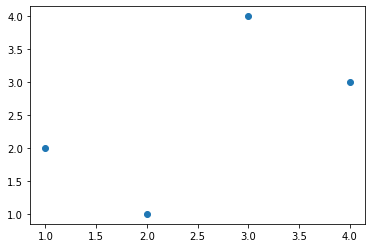

In [2]:
X = np.array([1,2,3,4])
y = np.array([2,1,4,3])

plt.scatter(X, y)

* scikit-learn에서 모델 학습을 위한 데이터는 (n,c) 형태 이여야 함
  * n : 데이터 개수
  * c : feature 개수
  * **reshape()** 로 형태 변환이 가능함

In [3]:
X, X.shape # (4,)

(array([1, 2, 3, 4]), (4,))

In [4]:
data = X.reshape(-1,1) # data = X.reshape(4,1)
data, data.shape

(array([[1],
        [2],
        [3],
        [4]]),
 (4, 1))

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(data, y)

print('intercept :', model.intercept_, 'coef :', model.coef_) 

intercept : 1.0000000000000004 coef : [0.6]


In [6]:
pred = model.predict(data)
pred

array([1.6, 2.2, 2.8, 3.4])

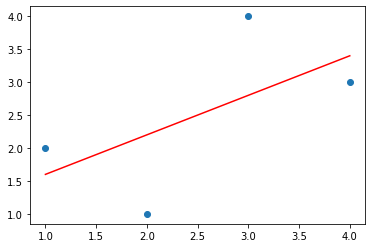

In [7]:
plt.scatter(X, y)
plt.plot(data, pred, c='r')

### 2. Multivariate Regression

* $ y= X \beta $ 
* $ \hat{y} = \beta _0 + \beta _1 x_1 + \beta _2 x_2 ..$

In [8]:
bias = 1
beta = np.array([2,3,4,5]).reshape(4, 1)
noise = np.random.randn(100, 1) # noise 설정

In [9]:
X = np.random.randn(100, 4)
y = bias + X.dot(beta)
y_with_noise = y + noise

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y_with_noise)

print('intercept :', model.intercept_, 'coef :', model.coef_) 

intercept : [1.11417641] coef : [[1.99383579 2.94374717 3.97346537 4.84223742]]


* 통계적 방법으로 회귀식 계산
  * $\beta = (X^T X)^{-1}X^Ty$

In [11]:
bias_X = np.array([1]*len(X)).reshape(-1, 1)
stat_X = np.hstack([bias_X, X])
X_X_transpose = stat_X.transpose().dot(stat_X)
X_X_transpose_inverse = np.linalg.inv(X_X_transpose) # 역함수

In [12]:
stat_beta = X_X_transpose_inverse.dot(stat_X.transpose()).dot(y_with_noise)
stat_beta

array([[1.11417641],
       [1.99383579],
       [2.94374717],
       [3.97346537],
       [4.84223742]])

### 3. Polynomial Regression

In [13]:
bias = 1
beta = np.array([2,3]).reshape(2, 1)
noise = np.random.randn(100, 1)

In [14]:
X = np.random.randn(100, 1)
X_poly = np.hstack([X, X**2])
X_poly[:10]

array([[-0.92491748,  0.85547234],
       [ 1.01010697,  1.02031609],
       [ 0.75532068,  0.57050933],
       [ 0.8542725 ,  0.7297815 ],
       [ 0.70907623,  0.5027891 ],
       [ 0.82063592,  0.67344331],
       [ 0.12924242,  0.0167036 ],
       [ 0.07362991,  0.00542136],
       [-0.25463986,  0.06484146],
       [ 0.06335837,  0.00401428]])

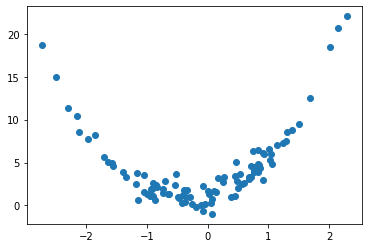

In [15]:
y = bias + X_poly.dot(beta)
y_with_noise = y + noise

plt.scatter(X, y_with_noise)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_poly, y_with_noise)

print('intercept :', model.intercept_, 'coef :', model.coef_) 

intercept : [1.0466608] coef : [[2.02459592 2.96023615]]


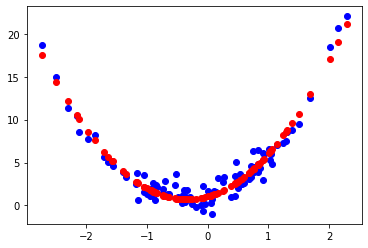

In [17]:
pred = model.predict(X_poly)

plt.scatter(X, y_with_noise, c='b')
plt.scatter(X, pred, c='r')

## [ Linear Regression/Multivariate Regression/Polynomial Regression : diabetes 데이터]

### 1. 데이터 load 및 EDA

* 당뇨병 진행도와 관련된 데이터

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [19]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [20]:
# feature_names : 변수명
'''
- `age`: 나이
- `sex`: 성별
- `bmi`: Body mass index
- `bp`: Average blood pressure
- 혈청에 대한 6가지 지표들
    - `S1`, `S2`, `S3`, `S4`, `S5`, `S6
'''

diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [21]:
data, target = diabetes["data"], diabetes["target"]

In [22]:
data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [23]:
target[0]

151.0

In [24]:
df = pd.DataFrame(data, columns=diabetes["feature_names"])
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


 train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)

- `*arrays`: 입력은 array로 이루어진 데이터을 받습니다.
- `test_size`: test로 분할될 사이즈를 정합니다.
- `train_size`: train으로 분할될 사이즈를 정합니다.
- `random_state`: 다음에도 같은 값을 얻기 위해서 난수를 고정합니다
- `shuffle`: 데이터를 섞을지 말지 결정합니다.
- `stratify`: 데이터를 나눌 때 정답의 분포를 반영합니다.



In [25]:
# train_test_split : train data와 test data 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [26]:
print("train ratio : {:.2f}".format(len(X_train)/len(data)))
print("test ratio : {:.2f}".format(len(X_test)/len(data)))

train ratio : 0.70
test ratio : 0.30


### 2. Multivariate Regression

* 학습

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print('intercept :', model.intercept_, 'coef :', model.coef_) 

intercept : 147.71524417759434 coef : [  15.28529701 -218.59128442  545.19999487  263.6592052  -582.66349612
  317.33684049   48.53542723  215.51374612  655.7965519    64.04030953]


* 예측

In [28]:
multi_train_pred = model.predict(X_train)
multi_test_pred = model.predict(X_test)

* 평가 : MSE

In [29]:
from sklearn.metrics import mean_squared_error

multi_train_mse = mean_squared_error(multi_train_pred, y_train)
multi_test_mse = mean_squared_error(multi_test_pred, y_test)

print('Multi Regression Train MSE is', multi_train_mse)
print('Multi Regression Test MSE is', multi_test_mse)

Multi Regression Train MSE is 3034.262263427408
Multi Regression Test MSE is 2562.2749989982976


### 3. Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

model = Ridge()

model.fit(X_train, y_train)

print('intercept :', model.intercept_, 'coef :', model.coef_) 

intercept : 147.74060119766182 coef : [  46.89201977  -55.64009506  270.71747699  158.68867814   23.59440223
  -11.13019705 -130.05870493  122.00237806  225.92117758  107.08728777]


In [31]:
ridge_train_pred = model.predict(X_train)
ridge_test_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error

ridge_train_mse = mean_squared_error(ridge_train_pred, y_train)
ridge_test_mse = mean_squared_error(ridge_test_pred, y_test)

print('Ridge Regression Train MSE is', ridge_train_mse)
print('Ridge Regression Train MSE is', ridge_test_mse)

Ridge Regression Train MSE is 3556.1982644394584
Ridge Regression Train MSE is 3200.405118925102


### 4. LASSO Regression

In [33]:
from sklearn.linear_model import Lasso

model = Lasso()

model.fit(X_train, y_train)

print('intercept :', model.intercept_, 'coef :', model.coef_) 

intercept : 148.13825690433762 coef : [  0.           0.         377.69541767   0.           0.
   0.          -0.           0.         316.05550058   0.        ]


In [34]:
lasso_train_pred = model.predict(X_train)
lasso_test_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error

lasso_train_mse = mean_squared_error(lasso_train_pred, y_train)
lasso_test_mse = mean_squared_error(lasso_test_pred, y_test)

print('LASSO Regression Train MSE is', lasso_train_mse)
print('LASSO Regression Train MSE is', lasso_test_mse)

LASSO Regression Train MSE is 3897.952840232753
LASSO Regression Train MSE is 3581.684333861701


* 전체 비교

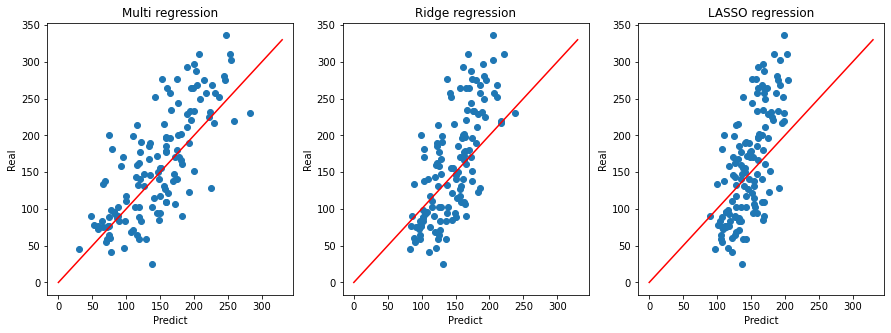

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
preds = [
    ("Multi regression", multi_test_pred),
    ("Ridge regression", ridge_test_pred),
    ("LASSO regression", lasso_test_pred),
]

for idx, (name, test_pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(test_pred, y_test)
    ax.plot(np.linspace(0, 330, 100), np.linspace(0, 330, 100), color="red")
    ax.set_xlabel("Predict")
    ax.set_ylabel("Real")
    ax.set_title(name)